<a href="https://colab.research.google.com/github/RayedShamim/Zomato-Restaurant-and-Reviews-Analysis/blob/main/Zomato_Restaurant_and_Reviews_Unsupervised_ML_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name** - Zomato Restaurant and Reviews Unsupervised ML Analysis
by Rayed Shamim



##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual


# **Project Summary -**

In this project we explore how different restaurants compare to each other based on rating, price category, number of cuisines they offer etc. We also see how different users rate different restaurants and what is their average spending. We perform EDA on the two datasets given and plot charts to visualise insights. Then we perform some preprossesing on review corpus of words to prepare our data for modelling. After that we perform aglomerative hierarchical clustering on restaurants data and perfrom LDA topic modeling to find out the probable words for each topics. Then we use visuallization tools such as pyLDAvis to see how different words are related to each topic.

# **GitHub Link -**

https://github.com/RayedShamim/Zomato-Restaurant-and-Reviews-Analysis/blob/main/Zomato_Restaurant_and_Reviews_Unsupervised_ML_Analysis.ipynb

# **Problem Statement**


Zomato is one of the largest food delivery app in the world. Restaurant and users from around the world enjoy different cuisines and share their reviews and experiences on this platform. Founded in 2008, Zomato has now expanded into 24 different countries and has its presence in almost 10,000 cities.

Having such a large user base, it is important for this platform to make the data of restaurants presented to the users in more organised format so that users can filter restaurants based on reviews, rating, pricing etc.

Platforms such as zomato continue to grow in trend and this is because the information of all restaurants present in one single place makes it very convienent for the users to choose their restaurants based on cuisines they like, their budget and also based on popularity.

Therefore we are going to we are going to explore the restaurants in Indian cities and see how users like to review them.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from datetime import date
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
import plotly.graph_objects as go

from sklearn import preprocessing
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from nltk.corpus import stopwords
import string

### Dataset Loading

In [2]:
# Load Dataset
# rev = reviews dataset
# rest = restaurant dataset

rev = pd.read_csv('https://raw.githubusercontent.com/RayedShamim/Zomato-Restaurant-and-Reviews-Analysis/main/Zomato%20Restaurant%20reviews.csv')
rest = pd.read_csv('https://raw.githubusercontent.com/RayedShamim/Zomato-Restaurant-and-Reviews-Analysis/main/Zomato%20Restaurant%20names%20and%20Metadata.csv')

### Dataset First View

In [3]:
# Dataset First Look
rev.head(10)

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0
5,Beyond Flavours,Nagabhavani K,"Ambiance is good, service is good, food is aPr...",5,1 Review,5/24/2019 15:22,0
6,Beyond Flavours,Jamuna Bhuwalka,"Its a very nice place, ambience is different, ...",5,1 Review,5/24/2019 1:02,0
7,Beyond Flavours,Sandhya S,Well after reading so many reviews finally vis...,4,1 Review,5/23/2019 15:01,0
8,Beyond Flavours,Akash Thorat,"Excellent food , specially if you like spicy f...",5,"1 Review , 1 Follower",5/22/2019 23:12,0
9,Beyond Flavours,Smarak Patnaik,Came for the birthday treat of a close friend....,5,"1 Review , 1 Follower",5/22/2019 22:37,0


In [4]:
rest.head(10)

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."
5,The Fisherman's Wharf,https://www.zomato.com/hyderabad/the-fisherman...,"1,500","Sunday Brunches, Corporate Favorites, Great Bu...","Seafood, Goan, North Indian, Continental, Asian","12Noon to 3:30PM, 4PM to 6:30PM, 7PM to 11:30P..."
6,eat.fit,https://www.zomato.com/hyderabad/eat-fit-gachi...,500,Food Hygiene Rated Restaurants in Hyderabad,"Healthy Food, North Indian, Continental, South...",7 AM to 10 PM
7,Shah Ghouse Spl Shawarma,https://www.zomato.com/hyderabad/shah-ghouse-s...,300,NaN,Lebanese,12 Noon to 12 Midnight
8,Hyper Local,https://www.zomato.com/hyderabad/hyper-local-g...,"1,000","Great Buffets, Live Sports Screenings, Best Ba...","American, Chinese, North Indian, Kebab, South ...",12 Noon to 12 Midnight
9,Cream Stone,https://www.zomato.com/hyderabad/cream-stone-g...,350,Frozen Delights,"Ice Cream, Desserts","10 AM to 1 AM (Mon-Thu), 10 AM to 1:30 AM (Fri..."


### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
print(f'The restaurant rating dataset has {rest.shape[0]} rows and {rest.shape[1]} columns')
print(f'The restaurant reviews dataset has {rev.shape[0]} rows and {rev.shape[1]} columns')

The restaurant rating dataset has 105 rows and 6 columns
The restaurant reviews dataset has 10000 rows and 7 columns


### Dataset Information

In [6]:
# Dataset Info
rev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB


In [7]:
rest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB


#### Duplicate Values

In [8]:
# Dataset Duplicate Value Count
len(rest[rest.duplicated()])

0

In [9]:
len(rev[rev.duplicated()])

36

#### Missing Values/Null Values

In [10]:
# Missing Values/Null Values Count
rest.isnull().sum()

Name            0
Links           0
Cost            0
Collections    54
Cuisines        0
Timings         1
dtype: int64

In [11]:
rev.isnull().sum()

Restaurant     0
Reviewer      38
Review        45
Rating        38
Metadata      38
Time          38
Pictures       0
dtype: int64

<Axes: >

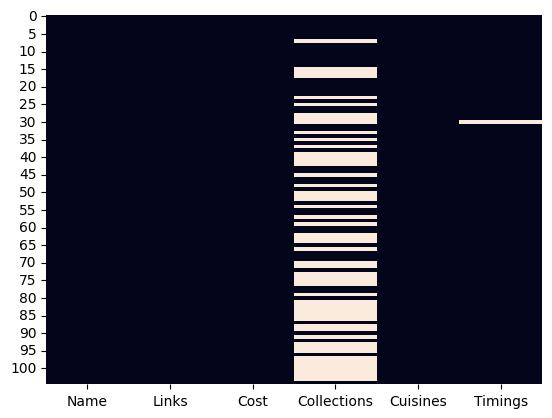

In [12]:
# Visualizing the missing values
sns.heatmap(rest.isnull(),cbar=False)

<Axes: >

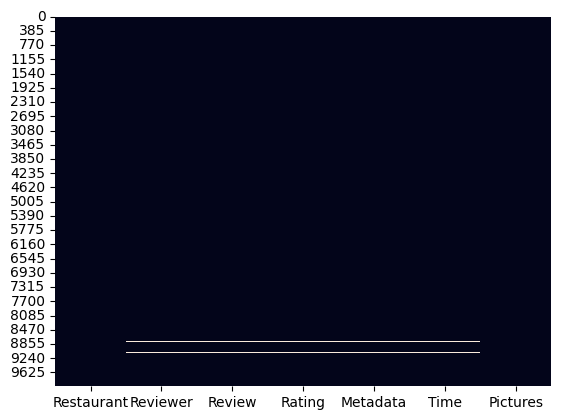

In [13]:
sns.heatmap(rev.isnull(),cbar=False)

### What did you know about your dataset?

So we have 2 datasets, one for restaurant ratings and second one for customer reviews for those restaurants. The shape of the restaurant ratings dataset has 105 rows and 6 columns. And the shape of the restaurant reviews dataset has 10000 rows and 7 columns. There are more than 50% missing values in restaurant ratings collections column and has 0 duplicate values. Wereas, the restaurant reviews dataset only 36 duplicated values and very few(45) missing values.

## ***2. Understanding Your Variables***

In [14]:
# Dataset Columns
print(f'Columns of restaurant reviews {list(rev.columns)}')
print(f'Columns of restaurant rating {list(rest.columns)}')

Columns of restaurant reviews ['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time', 'Pictures']
Columns of restaurant rating ['Name', 'Links', 'Cost', 'Collections', 'Cuisines', 'Timings']


In [15]:
# Dataset Describe
rev.describe()

,Pictures
count,10000.000000
mean,0.748600
std,2.570381
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,64.000000


In [16]:
rest.describe()

,Name,Links,Cost,Collections,Cuisines,Timings
count,105,105,105,51,105,104
unique,105,105,29,42,92,77
top,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,500,Food Hygiene Rated Restaurants in Hyderabad,"North Indian, Chinese",11 AM to 11 PM
freq,1,1,13,4,4,6


### Variables Description

###Zomato Restaurant Names

* Name: - Name of the restaurant
* Links: - Links to Restaurant page on Zomato's website
* Cost: - Average Price of the restaurants menu
* Collections: - Categories in restaurant menu
* Cuisines: - Types of cuisines
* Timing:- Open time of the restaurant

###Zomato Restaurant Reviews

* Restaurant: - Name of the restaurant
* Reviewer: - Name of the reviewer
* Review: - Review given by the reviewer
* Rating: - rating given by the reviewer
* Metadata: - Number reviews and number of followers the reviewer has
* Time: - The time at which the review was given
* Pictures: - Number of pictures taken while giving the review

### Check Unique Values for each variable.

In [17]:
# Check Unique Values for each variable.
for col in ['Name','Cost','Collections','Cuisines','Timings']:
  print(f'The unique values in column {col} are: {rest[col].unique()}')

The unique values in column Name are: ['Beyond Flavours' 'Paradise' 'Flechazo' 'Shah Ghouse Hotel & Restaurant'
 'Over The Moon Brew Company' "The Fisherman's Wharf" 'eat.fit'
 'Shah Ghouse Spl Shawarma' 'Hyper Local' 'Cream Stone'
 "Sardarji's Chaats & More" 'Barbeque Nation' 'Absolute Sizzlers'
 'The Lal Street - Bar Exchange' "AB's - Absolute Barbecues" 'KFC'
 'NorFest - The Dhaba' 'Hotel Zara Hi-Fi' '10 Downing Street'
 'Pakwaan Grand' '13 Dhaba'
 "Jonathan's Kitchen - Holiday Inn Express & Suites" 'B-Dubs' 'Amul'
 'SKYHY' 'Tiki Shack' 'Mustang Terrace Lounge'
 "3B's - Buddies, Bar & Barbecue" 'Behrouz Biryani' 'Hunger Maggi Point'
 'Pot Pourri' 'Pista House' 'Marsala Food Company' 'Club Rogue'
 'Mazzo - Marriott Executive Apartments' 'Green Bawarchi Restaurant'
 'Banana Leaf Multicuisine Restaurant' 'Kritunga Restaurant'
 'The Glass Onion' 'Deli 9 Bistro' 'Frio Bistro' 'Karachi Bakery'
 'Karachi Cafe' 'The Foodie Monster Kitchen' 'La La Land - Bar & Kitchen'
 'Owm Nom Nom' 'Ulavac

In [18]:
for col in list(rev.columns):
  if rev[col].nunique() < 37:
    print(f'The unique values of column {col} are {rev[col].unique()}')
  else :
    print(f'The number of unique values of column {col} are {rev[col].nunique()}')

The number of unique values of column Restaurant are 100
The number of unique values of column Reviewer are 7446
The number of unique values of column Review are 9364
The unique values of column Rating are ['5' '4' '1' '3' '2' '3.5' '4.5' '2.5' '1.5' 'Like' nan]
The number of unique values of column Metadata are 2477
The number of unique values of column Time are 9782
The unique values of column Pictures are [ 0  8  1  7  2  6  3  5  9  4 16 26 10 15 22 11 14 13 21 52 18 20 27 19
 12 41 42 37 28 17 25 24 34 64 23 32]


## 3. ***Data Wrangling***

### Data Wrangling Code

In [19]:
# Write your code to make your dataset.

rev = rev.drop_duplicates()

In [20]:
# Formating type, removing odd values, and creating new columns
rev.loc[rev.index[rev['Rating'] == 'Like'],['Rating']] = 5.0

In [21]:
# Function to get reviews of the reviewer
def getReviews(mystring):
  if type(mystring) != float:
    mystring = mystring[0:mystring.find(' ')]
    return np.int64(mystring)
  else:
    return mystring

# Function to get Following of the reviewer
def getFollowers(strarg):
  if type(strarg) != float:
    if 'Follower' in strarg:
      strarg = strarg[strarg.find(',')+1:strarg.rfind(' ')]
      return np.int64(strarg)
    else:
      return 0.0
  else:
    return strarg

In [22]:
rev.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9964 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  9964 non-null   object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    9964 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 880.8+ KB


In [23]:
for ele in rev['Metadata']:
  if type(ele) != float:
    if 'Review' not in ele:
      print(ele)

1 Post , 80 Followers
89 Posts , 1127 Followers
82 Posts , 1500 Followers
151 Posts , 2709 Followers
47 Posts , 4142 Followers
88 Posts , 1694 Followers


In [24]:
rev1 = rev.copy()
rev1['Reviews'] = rev['Metadata'].apply(lambda x: getReviews(x))
rev1['Followers'] = rev['Metadata'].apply(lambda x: getFollowers(x))
rev1['Rating'] = rev1['Rating'].astype(np.float64)

def convertTime(x):
  if type(x) != float:
    return datetime.strptime(x,'%m/%d/%Y %H:%M')

rev1['Time'] = rev1['Time'].apply(lambda x: convertTime(x))
rev1 = rev1.drop(columns=['Metadata'],axis=1)

In [25]:
rev1.tail(30)

,Restaurant,Reviewer,Review,Rating,Time,Pictures,Reviews,Followers
9970,Chinese Pavilion,Raghav Peddi 'The Food Shaukeen',#Delayedpost (date of visit Jan 10)\n\n#FoodSh...,3.5,2017-01-22 00:47:00,10,310.0,2001.0
9971,Chinese Pavilion,Aditya Goyal,Chinese authenticity in budget. Loved everythi...,4.5,2017-01-13 20:10:00,0,44.0,210.0
9972,Chinese Pavilion,Suvashri Dey,"Liked the food, the Tom yum soup was okay. The...",4.0,2017-01-09 12:47:00,0,14.0,5.0
9973,Chinese Pavilion,Vishesh Agarwal,It's very over rated on Zomato. Went to check ...,3.0,2017-01-07 00:46:00,0,37.0,115.0
9974,Chinese Pavilion,What's In A Name?,Went there with friends.The staff was polite.H...,3.5,2016-12-02 10:57:00,0,251.0,576.0
9975,Chinese Pavilion,Samir Majhi,My favorite Chinese restaurant in Hyderabad. F...,5.0,2016-11-27 21:45:00,0,5.0,53.0
9976,Chinese Pavilion,Sumanth,Just went due to the zomato rating. Small plac...,4.0,2016-11-26 11:30:00,1,126.0,1134.0
9977,Chinese Pavilion,Sattam Ray,"Amazing food,good ambience & great service...t...",4.5,2016-11-13 09:39:00,0,220.0,886.0
9978,Chinese Pavilion,Manav Mohanty,The food was just average. Staffs were very ni...,3.0,2016-11-12 11:38:00,0,42.0,98.0
9979,Chinese Pavilion,Ankush Agrawal,The place has authentic Chinese food. We had s...,4.0,2016-11-04 19:58:00,0,12.0,17.0


In [26]:
rest.head()

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


In [27]:
def collections(x):
  if type(x) not in [float,list]:
   return x.split(', ')
  else:
   return x


rest['Cuisines'] = rest['Cuisines'].apply(lambda x: x.split(', '))
rest['Collections'] = rest['Collections'].apply(lambda x: collections(x))
rest['Cost'] = rest['Cost'].apply(lambda x: x.replace(',',''))
rest['Cost'] = rest['Cost'].astype(np.int64)
rest.head()

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"[Food Hygiene Rated Restaurants in Hyderabad, ...","[Chinese, Continental, Kebab, European, South ...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,[Hyderabad's Hottest],"[Biryani, North Indian, Chinese]",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,1300,"[Great Buffets, Hyderabad's Hottest]","[Asian, Mediterranean, North Indian, Desserts]","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,[Late Night Restaurants],"[Biryani, North Indian, Chinese, Seafood, Beve...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,1200,"[Best Bars & Pubs, Food Hygiene Rated Restaura...","[Asian, Continental, North Indian, Chinese, Me...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


In [28]:
# Number of restaurants in different prices

df = rest.groupby('Cost').agg({'Cost':'count'})
df.columns = ['Count']
df.sort_values(by='Count',ascending=False).head(10)

,Count
Cost,
500,13
600,10
700,8
1200,7
1000,6
400,6
1500,5
200,5
800,5


In [29]:
# The most expensive and cheapest restaurants
cost_df = rest[['Name','Cost']].sort_values(by='Cost',ascending=False)
cost_df

,Name,Cost
92,Collage - Hyatt Hyderabad Gachibowli,2800
56,Feast - Sheraton Hyderabad Hotel,2500
21,Jonathan's Kitchen - Holiday Inn Express & Suites,1900
18,10 Downing Street,1900
91,Cascade - Radisson Hyderabad Hitec City,1800
...,...,...
85,Momos Delight,200
29,Hunger Maggi Point,200
101,Sweet Basket,200
89,Mohammedia Shawarma,150


In [30]:
# Restaurants based on Collection types

def findUniques(col):
  uniques = set()
  for ele in rest[col]:
    if type(ele) != float:
      for a in ele:
        uniques.add(a)
  return list(uniques)

collections = findUniques('Collections')
cuisines = findUniques('Cuisines')
print(f'The number of unique values in Collections are {len(collections)}')
print(f'The number of unique values in Cuisines are {len(cuisines)}')

The number of unique values in Collections are 37
The number of unique values in Cuisines are 44


In [31]:
# Finding the number of restaurants that have different cuisines and collections
def findFrequency(df,col):
  frequency = {}
  for l in df[col]:
    if type(l) != float:
      for ele in l:
        if ele in frequency.keys():
          frequency[ele] += 1
        else :
          frequency[ele] = 1
  df = pd.DataFrame({col:frequency.keys(),'Restaurants': frequency.values()})
  return df

collections_df = findFrequency(rest,'Collections')
collections_df = collections_df.sort_values(by='Restaurants',ascending=False).reset_index(drop=True)
collections_df

,Collections,Restaurants
0,Great Buffets,11
1,Food Hygiene Rated Restaurants in Hyderabad,8
2,Live Sports Screenings,7
3,Hyderabad's Hottest,7
4,Corporate Favorites,6
5,Top-Rated,5
6,Gold Curated,5
7,Trending This Week,5
8,Sunday Brunches,4
9,Veggie Friendly,4


In [32]:
cuisines_df = findFrequency(rest,'Cuisines')
cuisines_df = cuisines_df.sort_values(by='Restaurants',ascending=False).reset_index(drop = True)
cuisines_df

,Cuisines,Restaurants
0,North Indian,61
1,Chinese,43
2,Continental,21
3,Biryani,16
4,Fast Food,15
5,Asian,15
6,Italian,14
7,Desserts,13
8,South Indian,9
9,Bakery,7


In [33]:
rev1.head()

,Restaurant,Reviewer,Review,Rating,Time,Pictures,Reviews,Followers
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,2019-05-25 15:54:00,0,1.0,2.0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,2019-05-25 14:20:00,0,3.0,2.0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,2019-05-24 22:54:00,0,2.0,3.0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,2019-05-24 22:11:00,0,1.0,1.0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,2019-05-24 21:37:00,0,3.0,2.0


In [34]:
reviewers = {}

for ele in rev1['Reviewer']:
  if type(ele) != float:
    if ele in reviewers.keys():
      reviewers[ele] += 1
    else:
      reviewers[ele] = 1
reviewers = pd.DataFrame({'Reviewer':reviewers.keys(),'Count':reviewers.values()})
reviewers = reviewers.sort_values(by='Count',ascending=False).reset_index(drop=True)
reviewers

,Reviewer,Count
0,Parijat Ray,13
1,Ankita,13
2,Kiran,12
3,Vedant Killa,11
4,Jay Mehta,11
...,...,...
7441,Anjana Dandekar,1
7442,Shailesh Agarwal,1
7443,Vinaya Chekuri,1
7444,Sonal Ambani,1


In [35]:
rev1[rev1['Reviewer'] == 'Parijat Ray']

,Restaurant,Reviewer,Review,Rating,Time,Pictures,Reviews,Followers
875,Hyper Local,Parijat Ray,"We have ordered Mutton Galouti, Chholey calzon...",4.0,2019-03-31 23:57:00,4,146.0,333.0
1245,Absolute Sizzlers,Parijat Ray,We had a very bad experience here. We have ord...,2.0,2019-04-08 23:54:00,1,146.0,333.0
1621,NorFest - The Dhaba,Parijat Ray,A must try place for north indian food lovers....,4.0,2019-01-31 23:51:00,0,146.0,333.0
2695,Mustang Terrace Lounge,Parijat Ray,The have a great ambience. The view from the r...,4.0,2019-01-31 22:50:00,0,146.0,333.0
3027,Pot Pourri,Parijat Ray,We visited this restaurant recently. We have o...,3.0,2019-04-08 19:20:00,2,146.0,333.0
3282,Marsala Food Company,Parijat Ray,I have visited this restaurant with a group of...,2.0,2019-02-28 22:33:00,0,146.0,333.0
3380,Club Rogue,Parijat Ray,The non veg starter items (specially chicken) ...,3.0,2019-01-31 23:48:00,0,146.0,333.0
3712,Kritunga Restaurant,Parijat Ray,Nice Andhra style spicy food in decent price. ...,3.0,2019-01-31 23:06:00,0,146.0,333.0
5328,Diners Pavilion,Parijat Ray,The ambience is really nice. The food items ar...,3.0,2019-02-28 22:35:00,0,146.0,333.0
5404,Asian Meal Box,Parijat Ray,I have ordered few non veg combos from here co...,3.0,2019-04-30 23:50:00,0,146.0,333.0


In [36]:
# Creating reviewer centric dataframe have various details about the reviewer

# rev1[rev1['Reviewer']=='Parijat Ray']['Followers'].iloc[0]
# rev1[rev1['Reviewer']=='Parijat Ray']['Pictures'].sum()

unique_reviewers = list(reviewers['Reviewer'])
total_reviews = list()
unique_reviews = list()
unique_followers = list()
total_pictures = list()
avg_spending = list()

for reviewer in unique_reviewers:
  unique_followers.append(rev1[rev1['Reviewer']==reviewer]['Followers'].iloc[0])
  total_reviews.append(rev1[rev1['Reviewer']==reviewer]['Reviews'].iloc[0])
  unique_reviews.append(reviewers[reviewers['Reviewer']==reviewer]['Count'].iloc[0])
  total_pictures.append(rev1[rev1['Reviewer']==reviewer]['Pictures'].sum())
  r = rev1[rev1['Reviewer']==reviewer]['Restaurant'].tolist()
  c = list()
  for ele in r:
    c.append(rest[rest['Name'] == ele]['Cost'].iloc[0])
  avg_spending.append(np.mean(c))

In [37]:
# Zipping the values
df_array = list(zip(unique_reviewers,total_reviews,avg_spending,unique_reviews,unique_followers,total_pictures,))

In [38]:
# Creating the reviewer centric dataframe
rev_df = pd.DataFrame(df_array,columns=['Reviewer','Total Reviews','Average Spending','Unique Reviews','Total Followers','Total Pictures'])

In [39]:
rev_df

,Reviewer,Total Reviews,Average Spending,Unique Reviews,Total Followers,Total Pictures
0,Parijat Ray,146.0,707.692308,13,333.0,7
1,Ankita,10.0,934.615385,13,8.0,10
2,Kiran,1.0,725.000000,12,0.0,0
3,Vedant Killa,86.0,868.181818,11,216.0,21
4,Jay Mehta,46.0,822.727273,11,43.0,14
...,...,...,...,...,...,...
7441,Anjana Dandekar,33.0,1700.000000,1,119.0,3
7442,Shailesh Agarwal,4.0,1700.000000,1,1.0,0
7443,Vinaya Chekuri,2.0,1700.000000,1,2.0,0
7444,Sonal Ambani,4.0,1700.000000,1,2.0,1


In [40]:
rev_df['Average Spending'].value_counts().head(10)

500.0     804
600.0     586
700.0     491
1200.0    437
400.0     389
1000.0    369
800.0     360
1500.0    315
1300.0    263
200.0     251
Name: Average Spending, dtype: int64

In [41]:
# Reviewers with highest number of total reviews
rev_df.sort_values(by='Total Reviews',ascending=False)

,Reviewer,Total Reviews,Average Spending,Unique Reviews,Total Followers,Total Pictures
372,Anvesh Chowdary,1031.0,1600.0,3,1654.0,0
6051,ᴀɴ.ᴏᴛʜᴇʀ.sᴇɴ,685.0,900.0,1,794.0,0
3780,Abc098,665.0,350.0,1,2275.0,0
2293,Mithun Ravindranathan,560.0,750.0,1,2863.0,0
3091,Mohd Zubair Ali (Hyderabad.Food.Diaries),482.0,600.0,1,1688.0,0
...,...,...,...,...,...,...
4707,Anam Zaman,0.0,150.0,1,0.0,0
4706,Sahithi Sahi330,0.0,150.0,1,2.0,0
6618,Sandeep Banda,0.0,500.0,1,75.0,0
2626,JayaKrishna,0.0,150.0,1,0.0,0


In [42]:
# Reviewers with highest average spending
rev_df.sort_values(by=['Unique Reviews','Average Spending'],ascending=False)

,Reviewer,Total Reviews,Average Spending,Unique Reviews,Total Followers,Total Pictures
1,Ankita,10.0,934.615385,13,8.0,10
0,Parijat Ray,146.0,707.692308,13,333.0,7
2,Kiran,1.0,725.000000,12,0.0,0
3,Vedant Killa,86.0,868.181818,11,216.0,21
4,Jay Mehta,46.0,822.727273,11,43.0,14
...,...,...,...,...,...,...
4842,Adarsh Mohanty,0.0,150.000000,1,0.0,0
4843,Vinod Kumar Nallavade,1.0,150.000000,1,0.0,0
4844,Jitendra Patil,2.0,150.000000,1,1.0,0
4845,Obaid,0.0,150.000000,1,0.0,0


In [43]:
# Reviewers with highest number of Followers
rev_df.sort_values(by='Total Followers',ascending=False)

,Reviewer,Total Reviews,Average Spending,Unique Reviews,Total Followers,Total Pictures
424,Satwinder Singh,186.0,1233.333333,3,13410.0,12
2862,Eat_vth_me,60.0,600.000000,1,13320.0,25
973,Samar Sardar,8.0,750.000000,2,11329.0,6
164,Foodies Hyderabad,31.0,650.000000,4,9494.0,3
56,Srinivas,34.0,785.714286,7,7628.0,0
...,...,...,...,...,...,...
5095,Deepali Yadav,1.0,800.000000,1,0.0,0
6250,Saleem,0.0,500.000000,1,0.0,0
5096,ప్రత్యూష సూరేపల్లి,1.0,800.000000,1,0.0,0
6248,Siddhu Yadavalli,1.0,500.000000,1,0.0,0


In [44]:
# Reviewers that have taken the most pictures
rev_df.sort_values(by='Total Pictures',ascending=False)

,Reviewer,Total Reviews,Average Spending,Unique Reviews,Total Followers,Total Pictures
230,Food Nawabs,130.0,962.5,4,5533.0,157
251,Vamshi Puli,59.0,975.0,4,611.0,93
686,Anvith Devulapally,124.0,1100.0,2,1035.0,83
258,The Hungry Indians,109.0,1250.0,4,621.0,83
127,Tavleen Kaur Gandhi,111.0,690.0,5,568.0,53
...,...,...,...,...,...,...
2978,Vishal Talari,2.0,400.0,1,27.0,0
2977,Sangam Madhulika,1.0,400.0,1,1.0,0
2976,BİG HULK,1.0,400.0,1,0.0,0
2975,Sam Kumar,3.0,400.0,1,0.0,0


In [45]:
# Creating Restaurant centric dataframe
unique_rest = list(rev1.Restaurant.unique())
print(f'Total number of restaurants in reviews dataset are {len(unique_rest)}.')

Total number of restaurants in reviews dataset are 100.


In [46]:
# Creating the list of values
avg_rating = list()
pic_taken = list()
visitor_avg_following = list()
max_following = list()
cost = list()

for restaurant in unique_rest:
  avg_rating.append(rev1[rev1['Restaurant'] == restaurant]['Rating'].mean())
  pic_taken.append(rev1[rev1['Restaurant'] == restaurant]['Pictures'].sum())
  visitor_avg_following.append(rev1[rev1['Restaurant'] == restaurant]['Followers'].mean())
  max_following.append(rev1[rev1['Restaurant'] == restaurant]['Followers'].max())
  cost.append(rest[rest['Name'] == restaurant]['Cost'].iloc[0])

# Zipping the values
rest_df_array = list(zip(unique_rest,avg_rating,cost,pic_taken,visitor_avg_following,max_following))

# Creating the dataframe
rest_df = pd.DataFrame(rest_df_array,columns=['Restaurant','Average Rating','Cost','Pictures Taken','Reviewers Average Following','Top Reviewer Following'])


In [47]:
rest_df

,Restaurant,Average Rating,Cost,Pictures Taken,Reviewers Average Following,Top Reviewer Following
0,Beyond Flavours,4.280,800,39,100.61,4734.0
1,Paradise,4.700,800,2,7.98,167.0
2,Flechazo,4.660,1300,55,27.48,860.0
3,Shah Ghouse Hotel & Restaurant,3.210,800,30,118.43,5083.0
4,Over The Moon Brew Company,4.340,1200,44,70.10,1101.0
...,...,...,...,...,...,...
95,Desi Bytes,2.900,400,10,198.88,9494.0
96,Hyderabadi Daawat,3.830,600,234,453.75,9494.0
97,Zega - Sheraton Hyderabad Hotel,4.450,1750,83,288.51,5873.0
98,Triptify,3.550,400,14,93.55,2116.0


In [48]:
# Restaurant with highest average rating
rest_df.sort_values(by='Average Rating',ascending=False)

,Restaurant,Average Rating,Cost,Pictures Taken,Reviewers Average Following,Top Reviewer Following
14,AB's - Absolute Barbecues,4.880,1500,24,10.60,133.0
22,B-Dubs,4.810,1600,16,39.51,1514.0
27,"3B's - Buddies, Bar & Barbecue",4.760,1100,13,16.76,311.0
1,Paradise,4.700,800,2,7.98,167.0
2,Flechazo,4.660,1300,55,27.48,860.0
...,...,...,...,...,...,...
28,Behrouz Biryani,2.825,600,36,105.21,2373.0
49,Mathura Vilas,2.820,500,31,80.40,2534.0
19,Pakwaan Grand,2.710,400,17,124.10,2860.0
54,Asian Meal Box,2.580,200,17,96.75,2079.0


In [49]:
# Best rated restaurant Details
rest[rest['Name'] == "AB's - Absolute Barbecues"][['Name','Collections','Cuisines']]

,Name,Collections,Cuisines
14,AB's - Absolute Barbecues,"[Barbecue & Grill, Great Buffets, Corporate Fa...","[European, Mediterranean, North Indian]"


In [50]:
# Restaurants with most pictures taken
rest_df.sort_values(by='Pictures Taken',ascending=False)

,Restaurant,Average Rating,Cost,Pictures Taken,Reviewers Average Following,Top Reviewer Following
60,PourHouse7,3.860000,1200,356,233.380000,5083.0
90,Arena Eleven,4.117647,1600,280,229.717647,3418.0
32,Marsala Food Company,3.460000,700,276,158.840000,2972.0
96,Hyderabadi Daawat,3.830000,600,234,453.750000,9494.0
87,American Wild Wings,3.974026,600,218,326.324675,13320.0
...,...,...,...,...,...,...
57,Being Hungry,3.660000,450,3,56.780000,1224.0
62,Shree Santosh Dhaba Family Restaurant,2.830000,500,2,5.620000,102.0
1,Paradise,4.700000,800,2,7.980000,167.0
64,Hyderabad Chefs,3.810000,600,2,38.140000,1290.0


In [51]:
# Restaurants with highest Average Reviewers Following
rest_df.sort_values(by='Reviewers Average Following',ascending=False)

,Restaurant,Average Rating,Cost,Pictures Taken,Reviewers Average Following,Top Reviewer Following
31,Pista House,3.230,1000,146,510.68,11329.0
65,Komatose - Holiday Inn Express & Suites,3.690,1500,97,462.29,13410.0
96,Hyderabadi Daawat,3.830,600,234,453.75,9494.0
68,The Tilt Bar Republic,3.845,1500,158,421.26,13410.0
94,Dunkin' Donuts,3.095,550,98,376.67,3466.0
...,...,...,...,...,...,...
81,Delhi-39,2.975,600,4,12.22,301.0
14,AB's - Absolute Barbecues,4.880,1500,24,10.60,133.0
1,Paradise,4.700,800,2,7.98,167.0
89,Mohammedia Shawarma,2.990,150,4,7.91,163.0


In [52]:
# # Restaurants that got visited by top Reviewer based on Following
rest_df.sort_values(by='Top Reviewer Following',ascending=False)

,Restaurant,Average Rating,Cost,Pictures Taken,Reviewers Average Following,Top Reviewer Following
39,Deli 9 Bistro,3.820000,700,135,290.030000,13410.0
65,Komatose - Holiday Inn Express & Suites,3.690000,1500,97,462.290000,13410.0
68,The Tilt Bar Republic,3.845000,1500,158,421.260000,13410.0
87,American Wild Wings,3.974026,600,218,326.324675,13320.0
31,Pista House,3.230000,1000,146,510.680000,11329.0
...,...,...,...,...,...,...
81,Delhi-39,2.975000,600,4,12.220000,301.0
1,Paradise,4.700000,800,2,7.980000,167.0
89,Mohammedia Shawarma,2.990000,150,4,7.910000,163.0
14,AB's - Absolute Barbecues,4.880000,1500,24,10.600000,133.0


In [53]:
# Details of most expensive restaurant
rest_df[rest_df['Restaurant'] == 'Collage - Hyatt Hyderabad Gachibowli']

,Restaurant,Average Rating,Cost,Pictures Taken,Reviewers Average Following,Top Reviewer Following
92,Collage - Hyatt Hyderabad Gachibowli,3.41,2800,173,178.26,1948.0


In [54]:
# Details of cheapest Restaurant
rest_df[rest_df['Restaurant'] == 'Amul']

,Restaurant,Average Rating,Cost,Pictures Taken,Reviewers Average Following,Top Reviewer Following
23,Amul,3.94,150,13,70.08,2007.0


### What all manipulations have you done and insights you found?

From Analysis, I have come to find that most restaurants are priced at around 500-600 rupees. There are about 44 Cuisines and 37 Collections in the dataset. And the top 3 cuisines found in the restaurants are North Indian, Chinese and Continental. The top 3 Collections of restaurants are Great Buffets, Food Hygiene Rated Restaurants and Live Sports Screenings.

##Reviewers that had: -
* Highest Total Reviews: - Anvesh Chowdary with 1031 Reviews
* Highest Followers: - Satwinder Singh with 13410 Followers
* Most Pictures taken: - Food Nawabs with 157 pictures
* Highest Average Spending: - Anikta with 934.61 rupees

The top reviewers by count in dataset are Parijat Ray, Ankita, Kiran.
The top most followed reviewer is

## Restaurants that had: -
* Highest Rating: - AB's - Absolute Barbecues with 4.88/5.0
* Most Pictures taken: - PourHouse7 with 356 photos
* Average Reviewers Following: - Pista House with 510 avg followers of its reviewers

Top Followings reviewer(i.e. Satwinder Singh) has reviewed order from following restaurants : -
* Deli 9 Bistro
* Komatosa - Holiday Inn Express & Suites
* The Tilt Bar Republic


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 Number of Restaurants in different price categories (Univariate Analysis)

In [55]:
# Chart - 1 #Restaurants in Different price categories
fig = px.histogram(rest,x='Cost',title='Price distribution of Restaurants',nbins = 30)
fig.update_traces(marker_color = 'firebrick')
fig.show()

##### 1. Why did you pick the specific chart?

A Histogram or a bar chart is used to show the frequency of the column classes. Hence this chart was used to show the frequency of different price categories of restaurants.

##### 2. What is/are the insight(s) found from the chart?

As we can see that most of the restaurant falls in the price category of 500 to 800 range. There are also considerable number of restaurants available in the range of 800 to 2000 rupees.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, we can see that most number of restaurants are priced in the range of 500 to 800, this can help us target ads to consumers that prefer restaurants in this price range.

#### Chart - 2 Restaurant Names with different price categories (Bi-variate Analysis)

In [56]:
# Chart - 2 Restaurant names with Diferent Price Categories
fig = px.bar(cost_df, x='Name',y='Cost',color='Cost',title='Restaurants with Different Price Categories')
fig.show()

##### 1. Why did you pick the specific chart?

A bar chart is used to compare values of different categories between two or more variables. Hence this chart was used to compare prices of different restaurants.

##### 2. What is/are the insight(s) found from the chart?

We see that there are very few restaurants at the top end and the bottom end of the price spectrum. This could be because there is usually very less customer base in these price categories.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

From a business perspective, one can learn that there is a larger spectrum of restaurants in between the top most and bottom most price categories, which mean most of the ads would be related to the cuisines that are offered by these middle spectrum restaurants.

#### Chart - 3 Percentage of Restaurants with different Cuisines and Collections (Bi-variate Analysis)

In [57]:
# Chart - 3 Portion of Restaurants with Different Cuisines
fig = px.pie(cuisines_df,names='Cuisines',
             values='Restaurants',
             color_discrete_sequence=px.colors.sequential.RdBu,
             title='Percentage of Restaurants with Different Cuisines')
fig.update_traces(textposition='inside')
fig.show()

In [58]:
# Portion of Restaurants with Different Collections
fig = px.pie(collections_df,
             names='Collections',
             values='Restaurants',
             color_discrete_sequence=px.colors.sequential.Blugrn_r,
             title='Percentage of Restaurants with Different Collections')
fig.update_traces(textposition='inside')
fig.show()

##### 1. Why did you pick the specific chart?

A pie chart is used to show part-in-total values of the dataset. Hence this chart was used to visualise the percentage of restaurants that offer different cuisines and what collections they belong to.

##### 2. What is/are the insight(s) found from the chart?

The largest portion of restaurants offer North Indian, Chinese and Continental cuisines. And the top collection of restaurants belong to Great Buffets, Food Hygiene Rated Restaurants in Hyderabad, Live Sports Screening and Hyderabad's Hottest.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

From a business perspective, one can learn that most restaurants offer North Indian, Chinese and Continental cuisines and they belong to buffet & hygienic  style serving. This means that most ads of zomato will be targeting audience around these cuisines and collections.

#### Chart - 4 Correlation Between Average Spending vs Other Variables (Bi - Variate Analysis)

In [59]:
# Chart - 4 Correlation code for finding relation betwee columns of rev_df
for col in rev_df.describe().columns:
  if 'Average Spending' not in col:
    fig = px.scatter(rev_df,
                     x=col,
                     y='Average Spending',
                     title="Average Spending vs %s chart" % col,
                     trendline='ols')
    fig.show()

##### 1. Why did you pick the specific chart?

Scattered plots helps in visualizing clusters of data points between two or more variables. By creating some straightforward linear separations or basic lines in our data set, it also helps to create some straightforward classification models.

##### 2. What is/are the insight(s) found from the chart?

From the above observation, we find that there is a strong correlation between Average Spending and Total Reviews, Total Followers, Total Pictures taken. Amoungst these Total pictures had the strongest of correlation. Unique Reviews had neutral correlation with Average Spending.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

From a business perspective, the platform can encourage its reviewers to upload photos of their orders. This may help visually in ordering food from those restaurants.

#### Chart - 5 Cost vs Restaurant features comparison (Bi-variate Analysis)

In [60]:
# Chart - 5 Comparing average restaurant rating, reviewers average followers, pictures taken based on price categories of different restaurants.
for col in rest_df.describe().columns:
  if 'Cost' not in col:
    fig = px.bar(rest_df,
                 x='Cost',
                 y=col,
                 title='Cost vs %s Chart' % col,
                 color='Cost')
    fig.show()


##### 1. Why did you pick the specific chart?

A bar chart is used to compare values of different categories between two or more variables. Hence we are using Bar charts to compare Cost vs Average restaurant rating, Reviewers average following, Total pictures taken.

##### 2. What is/are the insight(s) found from the chart?

There are a number of insight that we find from these charts. We see that price categories of 500, 600 & 700 often have better average rating than other price categories. We also see that 500, 600 & 700 have the highest number of top influencers orders.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Restaurants that are in the price categories of 500, 600 & 700 have more engagement. This could also mean that restaurants in these price categories have more orders than others making these restaurants the center of focus for platforms like zomato.

#### Chart - 6 Time vs Restaurant features Analysis (Univariate Analysis)

In [61]:
# Chart - 6
# Time vs Rating code
fig = px.scatter(rev1,
                 x='Time',
                 y='Rating',
                 marginal_x="histogram",
                 marginal_y="histogram",
                 color_discrete_sequence=px.colors.sequential.Blugrn_r ,
                 title='Time vs Rating Chart')
fig.show()

In [62]:
# Time vs Pictures uploaded code Analysis
fig = px.scatter(rev1,
                 x='Time',
                 y='Pictures',
                 marginal_x="histogram",
                 marginal_y="histogram",
                 color_discrete_sequence=px.colors.sequential.Blugrn_r ,
                 title='Time vs Pictures Uploaded Chart')
fig.show()

##### 1. Why did you pick the specific chart?

I used a marginal distribution plots. Marginal Distribution plot are used to show the distribution of data along only one dimension. Hence this chart was used to compare Rating and pictures uploaded with time.

##### 2. What is/are the insight(s) found from the chart?

From the above observation, we see that both ratings and picture uploads are increasing with time. We see that reviewer engagement has increase significantly from July 2018 and majority of the rating are 5.0 followed by 4.0, 1.0, 3.0, 2.0. Similar is the case with pictures uploaded. A large user engagement is seen in the year 2019 and trend seems to be increasing only.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

We can see that most reviewers don't upload pictures. Pictures help consumers to learn about the quality of service of restaurant and Zomatos delivery service, therefore we can request reviewers to upload pictures while making a review.

#### Chart - 7

In [63]:
# Chart - 7 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8 - Box plots of Restaurant Features

In [64]:
# Chart - 8 visualization code
for col in rest_df.describe().columns:
  if 'Cost' not in col:
    fig = px.box(rest_df,
                 x='Cost',
                 y=col,
                 title='Cost vs %s' %col,
                 color='Cost')
    fig.update_traces(quartilemethod="exclusive")
    fig.show()

##### 1. Why did you pick the specific chart?

Box plots are used to show quarterly analysis of datasets. It show in what proportion (25%, 50%, 75%) the data is spread. It sometimes helps us find outliers as well.

##### 2. What is/are the insight(s) found from the chart?

We can see that there are 4 distant data point in the above chart. These data points are: -
* Pictures taken - 80 in 500 category and 356 in 1200 category
* Top Reviewer Following - 13410 in 700 category and 11329 in 1000 category

#### Chart - 9 - Correlation Heatmap

In [65]:
# Correlation Heatmap visualization code
fig = px.imshow(rev1.corr(numeric_only=True), text_auto=True,title='Correlation Heatmap of Reviews Dataset')
fig.show()

In [66]:
# Modified Reviews Dataset Correlation
fig = px.imshow(rev_df.corr(numeric_only=True),
                text_auto=True,
                title='Correlation Heatmap of Modified Reviews Dataset')
fig.show()

##### 1. Why did you pick the specific chart?

Correlation heatmap are generally used to visualize corelation/dependency of one variable with the other.

##### 2. What is/are the insight(s) found from the chart?

We can see that there is some correlation between Total Reviews and Total Followers, Total Reviews and Total Pictures, Total Pictures and Total Followers.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [67]:
# Handling Missing Values & Missing Value Imputation
# checking for missing null values in review dataset
rev.isnull().sum()

Restaurant    0
Reviewer      2
Review        9
Rating        2
Metadata      2
Time          2
Pictures      0
dtype: int64

In [68]:
# Removing Null values
rev1 = rev1.dropna()

In [69]:
# Confirming if nulls removed
rev1.isnull().sum()

Restaurant    0
Reviewer      0
Review        0
Rating        0
Time          0
Pictures      0
Reviews       0
Followers     0
dtype: int64

In [70]:
# checking for missing null values in Restaurant dataset
rest.isnull().sum()

Name            0
Links           0
Cost            0
Collections    54
Cuisines        0
Timings         1
dtype: int64

In [71]:
# Removing Collections column because it has more than 50% null values
rest = rest.drop(columns=['Collections'],axis=1)

In [72]:
# Imputing missing value from timing column with most frequent timing
rest['Timings'].fillna(rest['Timings'].mode().iloc[0],inplace=True)

In [73]:
# Confirming values
rest.isnull().sum()

Name        0
Links       0
Cost        0
Cuisines    0
Timings     0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

The missing values in reviews dataset were very less so I dropped them using dropna method. The duplicate values were removed earlier in the Data Wrangling section.

As for restaurant dataset, the collections column had more than 50% of null values hence the entire column was droped. Then in the timings column, 1 missing value was imputed with mode of that column.

### 2. Handling Outliers - Using Isolation Forest

In [74]:
# Handling Outliers & Outlier treatments
rev1.describe()

,Rating,Pictures,Reviews,Followers
count,9955.000000,9955.000000,9955.000000,9955.000000
mean,3.600402,0.751984,24.006730,163.108086
std,1.483565,2.575691,50.629274,620.153289
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,1.000000,1.000000
50%,4.000000,0.000000,4.000000,7.000000
75%,5.000000,0.000000,22.000000,63.000000
max,5.000000,64.000000,1031.000000,13410.000000


In [75]:
rev1.describe().columns

Index(['Rating', 'Pictures', 'Reviews', 'Followers'], dtype='object')

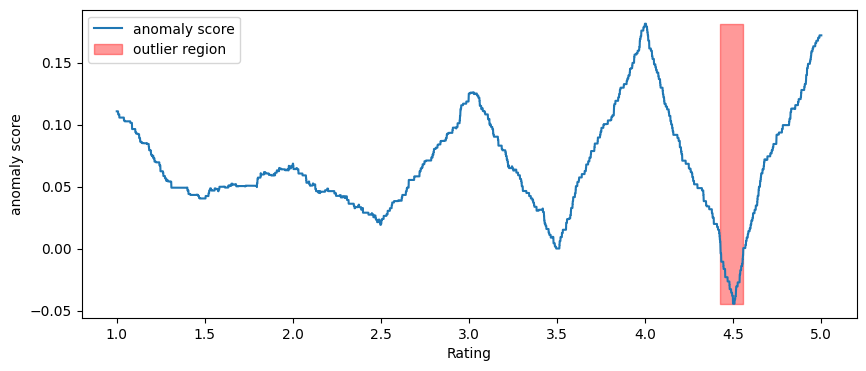

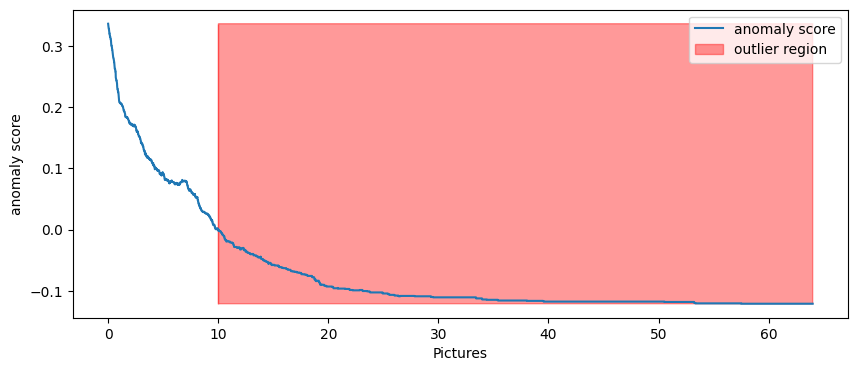

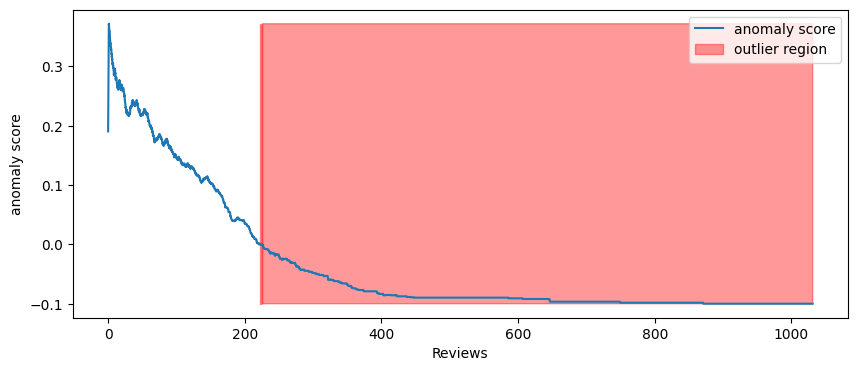

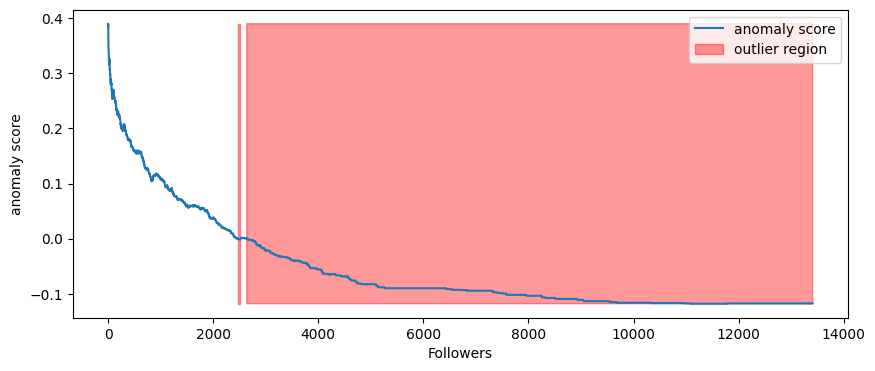

In [76]:
# Using Isolation forest to detect anomaly
from sklearn.ensemble import IsolationForest
for col in rev1.describe().columns:
  if 'Time' not in col:
    isolation_forest = IsolationForest(n_estimators=100, contamination=0.01)
    isolation_forest.fit(rev1[col].values.reshape(-1, 1))
    # rev1['anomaly_score_univariate_%s' % col] = isolation_forest.decision_function(rev1[col].values.reshape(-1, 1))
    # rev1['outlier_univariate_%s' % col] = isolation_forest.predict(rev1[col].values.reshape(-1, 1))

    x1 = np.linspace(rev1[col].min(), rev1[col].max(), len(rev1)).reshape(-1,1)
    anomaly_score = isolation_forest.decision_function(x1)
    outlier = isolation_forest.predict(x1)

    plt.figure(figsize=(10,4))
    plt.plot(x1, anomaly_score, label='anomaly score')
    plt.fill_between(x1.T[0], np.min(anomaly_score), np.max(anomaly_score),
                    where=outlier==-1, color='r',
                    alpha=.4, label='outlier region')
    plt.legend()
    plt.ylabel('anomaly score')
    plt.xlabel(col)
    plt.show()

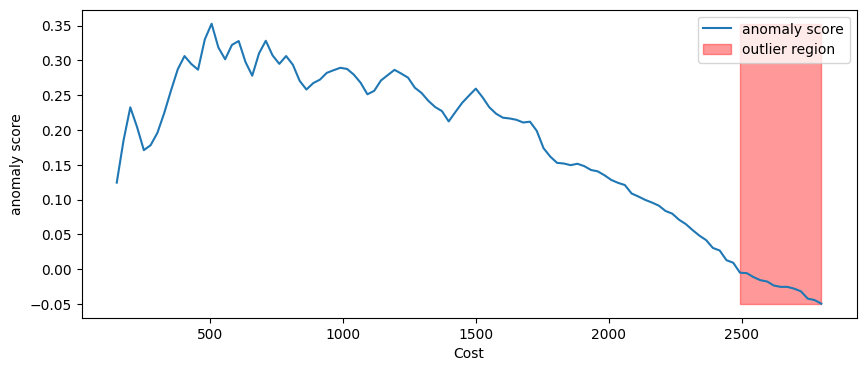

In [77]:
# Checking for outliers in Restaurant Cost
for col in rest.describe().columns:
  isolation_forest = IsolationForest(n_estimators=100, contamination=0.01)
  isolation_forest.fit(rest[col].values.reshape(-1, 1))
  rest['anomaly_score_univariate_%s' % col] = isolation_forest.decision_function(rest[col].values.reshape(-1, 1))
  rest['outlier_univariate_%s' % col] = isolation_forest.predict(rest[col].values.reshape(-1, 1))

  x2 = np.linspace(rest[col].min(), rest[col].max(), len(rest)).reshape(-1,1)
  anomaly_score = isolation_forest.decision_function(x2)
  outlier = isolation_forest.predict(x2)

  plt.figure(figsize=(10,4))
  plt.plot(x2, anomaly_score, label='anomaly score')
  plt.fill_between(x2.T[0], np.min(anomaly_score), np.max(anomaly_score),
                  where=outlier==-1, color='r',
                  alpha=.4, label='outlier region')
  plt.legend()
  plt.ylabel('anomaly score')
  plt.xlabel(col)
  plt.show()

In [78]:
# Function for capping outliers
def capOutliers(df,col):
  upper_lim = df[col].quantile(.95)
  lower_lim = df[col].quantile(.05)
  df.loc[(df[col] > upper_lim),col] = upper_lim
  df.loc[(df[col] < lower_lim),col] = lower_lim
  return df


In [79]:
# Capping Outliers in both DataFrames
for col in rev1.describe().columns:
  rev1 = capOutliers(rev1,col)

rest = capOutliers(rest,'Cost')

In [80]:
# Checking Ouliers
rest[rest['Cost'] >= 2500]

,Name,Links,Cost,Cuisines,Timings,anomaly_score_univariate_Cost,outlier_univariate_Cost


In [81]:
# Checking Outliers
rev1['Pictures'].value_counts()

0    7971
1     707
5     519
2     383
3     246
4     129
Name: Pictures, dtype: int64

In [82]:
# Df before removing outliers
rev['Pictures'].value_counts()

0     7980
1      707
2      383
3      246
4      129
5      116
7       86
6       85
8       55
9       47
10      35
15      12
12       9
11       9
14       7
13       6
20       5
17       4
19       4
27       4
21       4
18       4
22       4
16       4
24       3
26       2
42       2
28       2
25       2
34       2
52       1
41       1
37       1
64       1
23       1
32       1
Name: Pictures, dtype: int64

In [83]:
# Removing Anomaly and outlier columns
for col in rev1.describe().columns:
  if 'anomaly' in col or 'outlier' in col:
    rev1 = rev1.drop(columns=[col])

In [84]:
# Removing Anomaly and outlier columns
for col in rest.describe().columns:
  if 'anomaly' in col or 'outlier' in col:
    rest = rest.drop(columns=[col])

##### What all outlier treatment techniques have you used and why did you use those techniques?

I have used Isolation Forest to find outliers in my dataset. The outlier treatment technique used here is outlier capping in which we cap the outlying values with 95 and 5 quantile values.

### 3. Categorical Encoding

In [85]:
# Encode your categorical columns
# restaurant_cluster = pd.merge(rest[['Name','Cost','Cuisines']],
#                               rest_df[['Restaurant','Average Rating','Pictures Taken','Reviewers Average Following','Top Reviewer Following']],
#                               left_on='Name',right_on='Restaurant')


In [86]:
# Performing One Hot Encoding on Cusinies Column
# restaurant_cluster = restaurant_cluster.explode('Cuisines')
# restaurant_cluster = pd.get_dummies(restaurant_cluster,columns=['Cuisines'])
# restaurant_cluster

In [87]:
# Grouping by the rows to remove the repeated 'Name','Cost','Average Rating','Pictures Taken','Reviewers Average Following','Top Reviewer Following'
# restaurant_cluster = restaurant_cluster.groupby(['Name','Cost','Average Rating']).sum().reset_index()
# restaurant_cluster

In [88]:
# restaurant_cluster.T[0]

#### What all categorical encoding techniques have you used & why did you use those techniques?

At first I have merged two datasets namely "rest" and "rest_df" to obtain all the essential attributes of individual restaurants in one single dataframe. Then I did ***One Hot Encoding*** on Cuisines Column by using explode and groupby methods.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [89]:
pip install contractions

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 13.7 MB/s eta 0:00:00


In [90]:
# Expand Contraction
import contractions

def expand_contractions(text):
   expanded_text = contractions.fix(text)
   return expanded_text

rev_nlp = rev1.loc[:,['Restaurant','Review']]
rev_nlp['Review'] = rev_nlp.Review.apply(lambda x: expand_contractions(x))

In [91]:
# Checking how many values were expanded
x = 0
for i,ele in enumerate(rev1['Review']):
  if len(rev1['Review'].iloc[i]) != len(rev_nlp['Review'].iloc[i]):
    x += 1
    # print('It freaking happened')
print(f'{x} values was expanded!')

2983 values was expanded!


#### 2. Lower Casing

In [92]:
# Lower Casing
rev_nlp['Review'] = rev_nlp['Review'].apply(lambda x: x.lower())

In [93]:
rev_nlp.head()

,Restaurant,Review
0,Beyond Flavours,"the ambience was good, food was quite good . h..."
1,Beyond Flavours,ambience is too good for a pleasant evening. s...
2,Beyond Flavours,a must try.. great food great ambience. thnx f...
3,Beyond Flavours,soumen das and arun was a great guy. only beca...
4,Beyond Flavours,food is good.we ordered kodi drumsticks and ba...


#### 3. Removing Punctuations

In [94]:
# Remove Punctuations
import string

# Function for removing punctuations
def remove_punctuation(text):
    # replacing the punctuations with no space,
    # which in effect deletes the punctuation marks
    translator = str.maketrans('', '', string.punctuation)

    # return the text stripped of punctuation marks
    return text.translate(translator)

In [95]:
rev_nlp['Review'] = rev_nlp['Review'].apply(lambda x: remove_punctuation(x))

In [96]:
rev_nlp

,Restaurant,Review
0,Beyond Flavours,the ambience was good food was quite good had...
1,Beyond Flavours,ambience is too good for a pleasant evening se...
2,Beyond Flavours,a must try great food great ambience thnx for ...
3,Beyond Flavours,soumen das and arun was a great guy only becau...
4,Beyond Flavours,food is goodwe ordered kodi drumsticks and bas...
...,...,...
9995,Chinese Pavilion,madhumathi mahajan well to start with nice cou...
9996,Chinese Pavilion,this place has never disappointed us the food ...
9997,Chinese Pavilion,bad rating is mainly because of chicken bone f...
9998,Chinese Pavilion,i personally love and prefer chinese food had ...


#### 4. Removing URLs & Removing words and digits contain digits.

In [97]:
# Remove URLs & Remove words and digits contain digits
import re

# Removing links
rev_nlp['Review'] = rev_nlp['Review'].apply(lambda x: re.sub(r'http\S+', '', x))

# Removing Digits
rev_nlp['Review'] = rev_nlp['Review'].apply(lambda x: re.sub(r'[0-9]', '', x))

#### 5. Removing Stopwords & Removing White spaces

In [98]:
# Remove Stopwords
import nltk
nltk.download('stopwords')


# extracting the stopwords from nltk library
sw = stopwords.words('english')

# a function for removing the stopword
def remove_stopwords(text):

    # removing the stop words
    text = [word for word in text.split() if word not in sw]

    # joining the list of words with space separator
    return " ".join(text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [99]:
rev_nlp['Review'] = rev_nlp['Review'].apply(lambda x: remove_stopwords(x))

In [100]:
# Remove White spaces
rev_nlp['Review'] = rev_nlp['Review'].apply(lambda x: " ".join(x.split()))

In [101]:
rev_nlp['Review'].iloc[0]

'ambience good food quite good saturday lunch cost effective good place sate brunch one also chill friends parents waiter soumen das really courteous helpful'

#### 6. Rephrase Text

In [102]:
pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 71.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 35.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 127.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 87.6 MB/s eta 0:00:00


In [104]:
# import the BERT transformer for Paraphrasing
from transformers import BertTokenizer, BertModel, BertLMHeadModel

In [105]:
# Rephrase Text

def rephraseText(x):
  # Load the pre-trained model
  model = BertLMHeadModel.from_pretrained('bert-base-uncased')

  # Load the tokenizer
  tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

  # Tokenize the input text
  input_ids = tokenizer.encode(x, return_tensors="pt")

  # Generate the paraphrased text
  outputs = model.generate(input_ids)

  # Decode the output text
  output_text = tokenizer.decode(outputs[0], skip_special_tokens=True)

  # Print the paraphrased text
  return output_text

In [106]:
rev_nlp['Review'].iloc[0]

'ambience good food quite good saturday lunch cost effective good place sate brunch one also chill friends parents waiter soumen das really courteous helpful'

In [107]:
rephraseText(rev_nlp['Review'].iloc[0])

If you want to use `BertLMHeadModel` as a standalone, add `is_decoder=True.`


'ambience good food quite good saturday lunch cost effective good place sate brunch one also chill friends parents waiter soumen das really courteous helpful.'

**Didn't made any meaningfull changes, Not implementing Paraphrasing.**

#### 7. Tokenization

In [108]:
# Tokenization
nltk.download('punkt')

rev_nlp['Review'] = rev_nlp['Review'].apply(lambda x: nltk.tokenize.word_tokenize(x))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [109]:
rev_nlp

,Restaurant,Review
0,Beyond Flavours,"[ambience, good, food, quite, good, saturday, ..."
1,Beyond Flavours,"[ambience, good, pleasant, evening, service, p..."
2,Beyond Flavours,"[must, try, great, food, great, ambience, thnx..."
3,Beyond Flavours,"[soumen, das, arun, great, guy, behavior, sinc..."
4,Beyond Flavours,"[food, goodwe, ordered, kodi, drumsticks, bask..."
...,...,...
9995,Chinese Pavilion,"[madhumathi, mahajan, well, start, nice, court..."
9996,Chinese Pavilion,"[place, never, disappointed, us, food, courteo..."
9997,Chinese Pavilion,"[bad, rating, mainly, chicken, bone, found, ve..."
9998,Chinese Pavilion,"[personally, love, prefer, chinese, food, coup..."


#### 8. Text Normalization

In [110]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

#Initializing
lemmatizer = WordNetLemmatizer()

# Performing Lemmatization
rev_nlp['Review'] = rev_nlp['Review'].apply(lambda x: [lemmatizer.lemmatize(ele) for ele in x])

[nltk_data] Downloading package wordnet to /root/nltk_data...


##### Which text normalization technique have you used and why?

I have used the nltk library for Lemmatization of the tokens that are present in the Review column. I went for Lemmatization because Lemmatization finds the root word as opposed to simply trimming the word in stemming. Hence I went for Lemmatization.

#### 10. Text Vectorization

In [111]:
rev_nlp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9955 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  9955 non-null   object
 1   Review      9955 non-null   object
dtypes: object(2)
memory usage: 233.3+ KB


In [112]:
# Vectorizing Text
from sklearn.feature_extraction.text import TfidfVectorizer


tfid_vectorizer = TfidfVectorizer(tokenizer=lambda x: x,lowercase=False,smooth_idf=True)

text = rev_nlp['Review'].values

input_matrix = tfid_vectorizer.fit_transform(text)

dictionary = tfid_vectorizer.vocabulary_

In [113]:
dictionary

{'ambience': 483,
 'good': 6170,
 'food': 5486,
 'quite': 11975,
 'saturday': 13033,
 'lunch': 8728,
 'cost': 3280,
 'effective': 4586,
 'place': 11247,
 'sate': 13012,
 'brunch': 2031,
 'one': 10321,
 'also': 402,
 'chill': 2626,
 'friend': 5711,
 'parent': 10810,
 'waiter': 16314,
 'soumen': 13951,
 'da': 3611,
 'really': 12189,
 'courteous': 3330,
 'helpful': 6749,
 'pleasant': 11350,
 'evening': 4833,
 'service': 13290,
 'prompt': 11734,
 'experience': 5007,
 'kudos': 8193,
 'must': 9723,
 'try': 15632,
 'great': 6376,
 'thnx': 15237,
 'pradeep': 11520,
 'subroto': 14484,
 'personal': 11086,
 'recommendation': 12244,
 'penne': 11022,
 'alfredo': 320,
 'pasta': 10885,
 'music': 9698,
 'background': 1172,
 'amazing': 439,
 'arun': 854,
 'guy': 6501,
 'behavior': 1465,
 'sincerety': 13644,
 'course': 3321,
 'would': 16688,
 'like': 8485,
 'visit': 16233,
 'goodwe': 6273,
 'ordered': 10419,
 'kodi': 8135,
 'drumstick': 4446,
 'basket': 1351,
 'mutton': 9736,
 'biryani': 1685,
 'thanks'

##### Which text vectorization technique have you used and why?

I have used the TF-IDF vectorization technique to find out the term frequecy in the review dataset.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [114]:
# Manipulate Features to minimize feature correlation and create new features
restaurant_cluster = pd.merge(rest[['Name','Cost','Cuisines']],
                              rest_df[['Restaurant','Average Rating']],
                              left_on='Name',right_on='Restaurant')
restaurant_cluster = restaurant_cluster.drop(columns=['Restaurant'])
restaurant_cluster

,Name,Cost,Cuisines,Average Rating
0,Beyond Flavours,800.0,"[Chinese, Continental, Kebab, European, South ...",4.280
1,Paradise,800.0,"[Biryani, North Indian, Chinese]",4.700
2,Flechazo,1300.0,"[Asian, Mediterranean, North Indian, Desserts]",4.660
3,Shah Ghouse Hotel & Restaurant,800.0,"[Biryani, North Indian, Chinese, Seafood, Beve...",3.210
4,Over The Moon Brew Company,1200.0,"[Asian, Continental, North Indian, Chinese, Me...",4.340
...,...,...,...,...
95,Desi Bytes,400.0,"[North Indian, Chinese]",2.900
96,Hyderabadi Daawat,600.0,"[Hyderabadi, Chinese, Mughlai]",3.830
97,Zega - Sheraton Hyderabad Hotel,1740.0,"[Asian, Sushi]",4.450
98,Triptify,400.0,[North Indian],3.550


In [115]:
restaurant_cluster['Number of Cuisines'] = restaurant_cluster['Cuisines'].apply(lambda x: len(x))

In [116]:
restaurant_cluster

,Name,Cost,Cuisines,Average Rating,Number of Cuisines
0,Beyond Flavours,800.0,"[Chinese, Continental, Kebab, European, South ...",4.280,6
1,Paradise,800.0,"[Biryani, North Indian, Chinese]",4.700,3
2,Flechazo,1300.0,"[Asian, Mediterranean, North Indian, Desserts]",4.660,4
3,Shah Ghouse Hotel & Restaurant,800.0,"[Biryani, North Indian, Chinese, Seafood, Beve...",3.210,5
4,Over The Moon Brew Company,1200.0,"[Asian, Continental, North Indian, Chinese, Me...",4.340,5
...,...,...,...,...,...
95,Desi Bytes,400.0,"[North Indian, Chinese]",2.900,2
96,Hyderabadi Daawat,600.0,"[Hyderabadi, Chinese, Mughlai]",3.830,3
97,Zega - Sheraton Hyderabad Hotel,1740.0,"[Asian, Sushi]",4.450,2
98,Triptify,400.0,[North Indian],3.550,1


In [117]:
pic_taken = list()
reviewer_avg_following = list()

for restaurant in unique_rest:
  pic_taken.append(rev1[rev1['Restaurant'] == restaurant]['Pictures'].sum())
  reviewer_avg_following.append(rev1[rev1['Restaurant'] == restaurant]['Followers'].mean())

arr = list(zip(unique_rest,pic_taken,reviewer_avg_following))

temp_df = pd.DataFrame(arr,columns=['Name','Pictures Taken','Reviewer Average Following'])

In [118]:
temp_df

,Name,Pictures Taken,Reviewer Average Following
0,Beyond Flavours,30,49.42
1,Paradise,2,7.98
2,Flechazo,45,27.48
3,Shah Ghouse Hotel & Restaurant,29,64.49
4,Over The Moon Brew Company,43,67.84
...,...,...,...
95,Desi Bytes,10,87.10
96,Hyderabadi Daawat,109,180.16
97,Zega - Sheraton Hyderabad Hotel,67,151.58
98,Triptify,14,68.37


In [119]:
restaurant_cluster = pd.merge(restaurant_cluster,temp_df,left_on='Name',right_on='Name')

In [120]:
restaurant_cluster

,Name,Cost,Cuisines,Average Rating,Number of Cuisines,Pictures Taken,Reviewer Average Following
0,Beyond Flavours,800.0,"[Chinese, Continental, Kebab, European, South ...",4.280,6,30,49.42
1,Paradise,800.0,"[Biryani, North Indian, Chinese]",4.700,3,2,7.98
2,Flechazo,1300.0,"[Asian, Mediterranean, North Indian, Desserts]",4.660,4,45,27.48
3,Shah Ghouse Hotel & Restaurant,800.0,"[Biryani, North Indian, Chinese, Seafood, Beve...",3.210,5,29,64.49
4,Over The Moon Brew Company,1200.0,"[Asian, Continental, North Indian, Chinese, Me...",4.340,5,43,67.84
...,...,...,...,...,...,...,...
95,Desi Bytes,400.0,"[North Indian, Chinese]",2.900,2,10,87.10
96,Hyderabadi Daawat,600.0,"[Hyderabadi, Chinese, Mughlai]",3.830,3,109,180.16
97,Zega - Sheraton Hyderabad Hotel,1740.0,"[Asian, Sushi]",4.450,2,67,151.58
98,Triptify,400.0,[North Indian],3.550,1,14,68.37


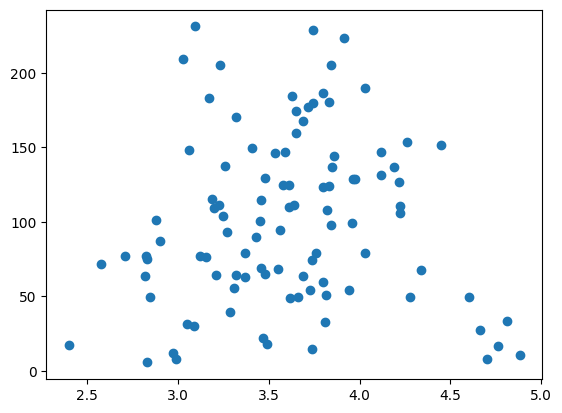

In [121]:
# Checking Graph
plt.scatter(x=restaurant_cluster['Average Rating'],y=restaurant_cluster['Reviewer Average Following'])

#### 2. Feature Selection

In [122]:
# Select your features wisely to avoid overfitting

# Dropping unnecessary features
restaurant_cluster = restaurant_cluster.drop(columns=['Cuisines'])
restaurant_cluster

,Name,Cost,Average Rating,Number of Cuisines,Pictures Taken,Reviewer Average Following
0,Beyond Flavours,800.0,4.280,6,30,49.42
1,Paradise,800.0,4.700,3,2,7.98
2,Flechazo,1300.0,4.660,4,45,27.48
3,Shah Ghouse Hotel & Restaurant,800.0,3.210,5,29,64.49
4,Over The Moon Brew Company,1200.0,4.340,5,43,67.84
...,...,...,...,...,...,...
95,Desi Bytes,400.0,2.900,2,10,87.10
96,Hyderabadi Daawat,600.0,3.830,3,109,180.16
97,Zega - Sheraton Hyderabad Hotel,1740.0,4.450,2,67,151.58
98,Triptify,400.0,3.550,1,14,68.37


In [123]:
len(tfid_vectorizer.get_feature_names_out())

17328

##### What all feature selection methods have you used  and why?

I have removed the Cuisines column as it does not serve the purpose of clustering. And in the reviews dictionary, we have a vocabulary of 17328 words/features, which is very normal for NLP analysis

##### Which all features you found important and why?

For restaurant clustering analysis, I have taken cost, average rating, number of cuisines, pictures taken, reviewers average following as the features for clustering analysis. This is because clustering analysis requires continues features to be plotted on a scatter plot.

### Since our data is prepared for clustering and Sentiment analysis, We will now move forward for modeling our data.

## ***7. ML Model Implementation***

### ML Model - 1 - Agglomerative Hierarchical Clustering (AHC) Model

In [124]:
# Class to model Agglomerative Hierarchical Clustering
class ahcModel:
  def __init__(self,x):
    self.x = x
    self.col1 = self.x.columns[0]
    self.col2 = self.x.columns[1]

  #Funtion for ploting Dendrogram
  def dendro(self,y1):
    dendrogram = sch.dendrogram(sch.linkage(self.x, method = 'ward'))
    plt.title('Dendrogram')
    plt.xlabel(self.col1)
    plt.ylabel('Euclidean Distances')
    plt.axhline(y=y1, color='r', linestyle='--')

  # Funtion for ploting clusters
  def plotCluster(self,n):
    hc = AgglomerativeClustering(n_clusters = n, metric = 'euclidean', linkage = 'ward')
    y_hc = hc.fit_predict(self.x)
    colors = ['red','blue','green','cyan','magenta','black']
    range = np.arange(max(y_hc)+1)
    for i in range:
      plt.scatter(self.x[y_hc == i][self.col1], self.x[y_hc == i][self.col2], s = 80, c = colors[i])

    plt.title(f'Clusters of Restaurants based on \n {self.col1} and {self.col2}')
    plt.xlabel(self.col1)
    plt.ylabel(self.col2)

In [125]:
# ML Model - 1 Implementation
x = restaurant_cluster[['Pictures Taken', 'Reviewer Average Following']]
model1 = ahcModel(x)

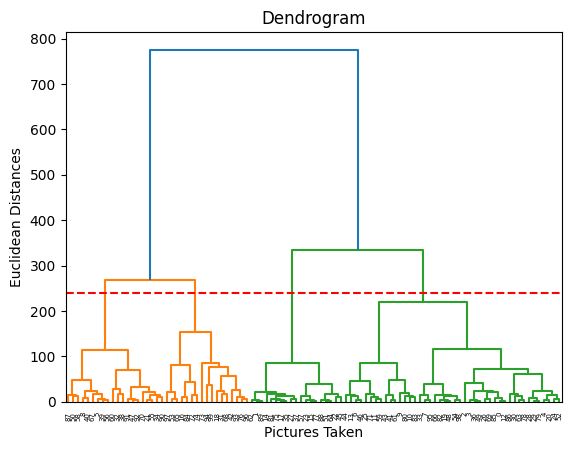

In [126]:
# checking number of clusters for Pictures Taken vs Reviewer Average Following for Restaurants
model1.dendro(240)

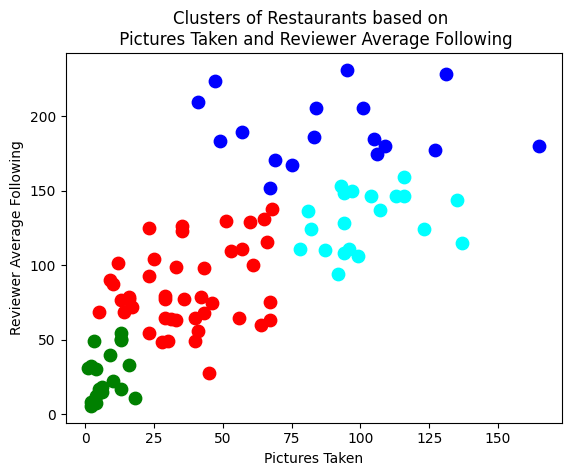

In [127]:
# Ploting Clusters for Picture Taken vs Reviewer Average Following
model1.plotCluster(4)

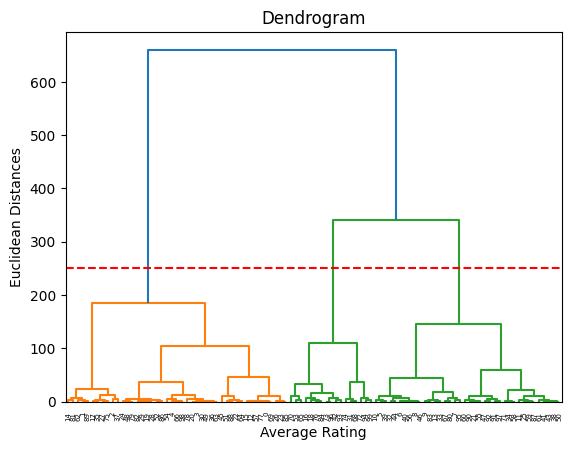

In [128]:
# Checking number of clusters for Average Rating vs Reviewer Average Following
x1 = restaurant_cluster[['Average Rating','Reviewer Average Following']]
model2 = ahcModel(x1)
model2.dendro(250)

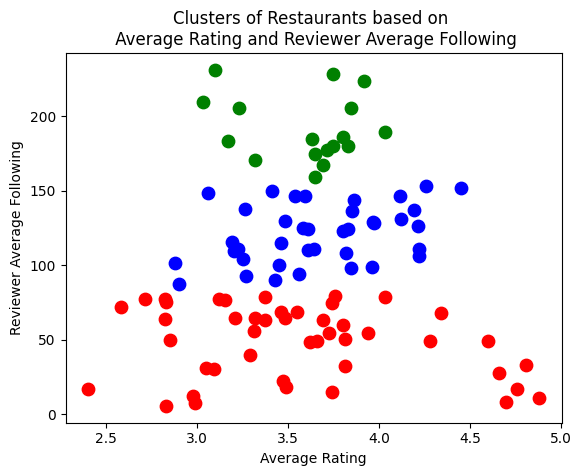

In [129]:
# Plotting cluster for Average Rating vs Reviewer Average Following
model2.plotCluster(3)

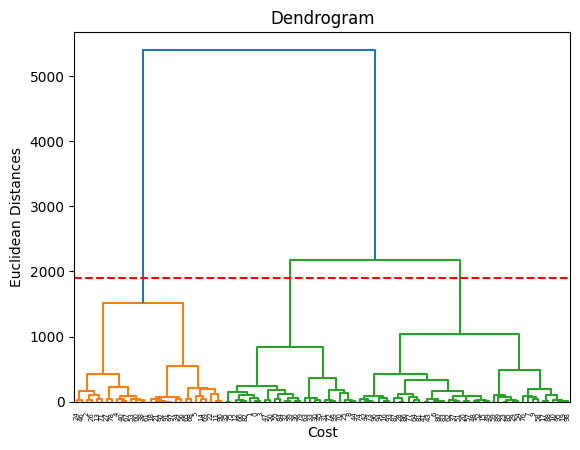

In [130]:
# Checking number of clusters for cost and average rating
x2 = restaurant_cluster[['Cost','Reviewer Average Following']]
model3 = ahcModel(x2)
model3.dendro(1900)

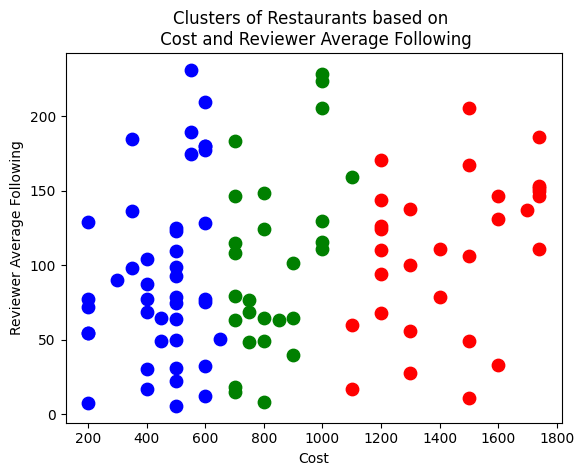

In [131]:
# Plotting Clusters for Cost vs Reviewer Average Following
model3.plotCluster(3)

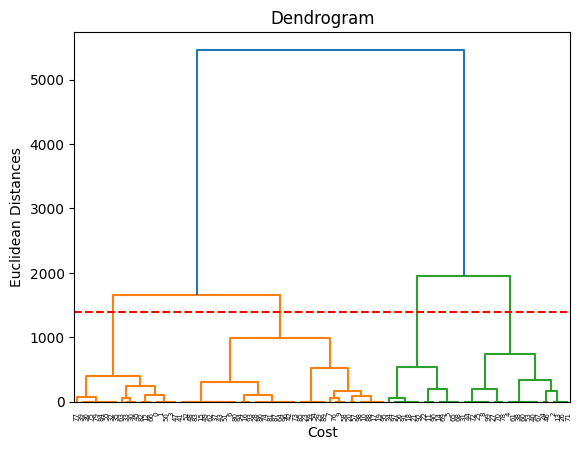

In [132]:
# Checking for Clusters for Cost vs Average Rating
x3 = restaurant_cluster[['Cost','Average Rating']]
model4 = ahcModel(x3)
model4.dendro(1400)

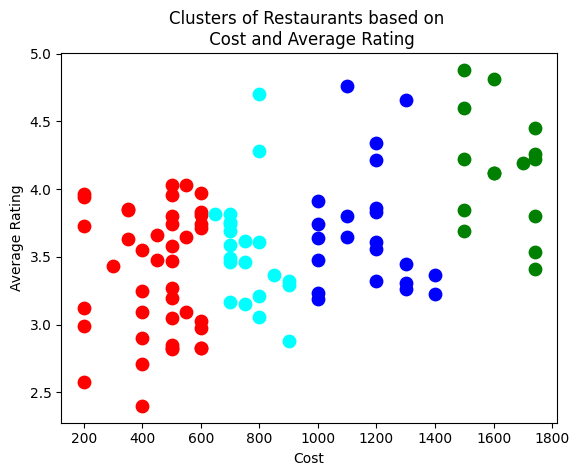

In [133]:
# Plotting Clusters for Cost vs Average Rating Restaurants
model4.plotCluster(4)

### ML Model - 2 - Latent Dirichlet Allocation (Top Modelling)

In [134]:
from sklearn.decomposition import LatentDirichletAllocation

In [135]:
print(input_matrix)

  (0, 6749)	0.21572984565246128
  (0, 3330)	0.18585213960245792
  (0, 12189)	0.12172888283639353
  (0, 3611)	0.2912498802426345
  (0, 13951)	0.3163738127247155
  (0, 16314)	0.18699725561288907
  (0, 10810)	0.2961942920268853
  (0, 5711)	0.14025763279617443
  (0, 2626)	0.2232772413297934
  (0, 402)	0.12010862869794933
  (0, 10321)	0.11364580713385229
  (0, 2031)	0.24345676202762354
  (0, 13012)	0.37579048946779386
  (0, 11247)	0.0782766173904352
  (0, 4586)	0.2989197682234581
  (0, 3280)	0.20712148765757343
  (0, 8728)	0.15871283924907484
  (0, 13033)	0.21821071588965193
  (0, 11975)	0.16648715778741632
  (0, 5486)	0.06994525604580105
  (0, 6170)	0.2099644587881992
  (0, 483)	0.10605223130484456
  (1, 8193)	0.367064759898959
  (1, 5007)	0.1805339000385831
  (1, 11734)	0.31412138943903845
  :	:
  (9954, 12891)	0.09356934482684627
  (9954, 9483)	0.07219491104227349
  (9954, 4598)	0.36750107020609474
  (9954, 2586)	0.09910092844673303
  (9954, 12626)	0.13636593116935636
  (9954, 5709)	0.15

In [ ]:
from sklearn.model_selection import GridSearchCV
grid_params = {'n_components' : list(range(5,10))}

# LDA model
lda = LatentDirichletAllocation()
lda_model = GridSearchCV(lda,param_grid=grid_params)
lda_model.fit(input_matrix)

In [ ]:
best_lda_model = lda_model.best_estimator_
# best_lda_model = LatentDirichletAllocation(n_components=5).fit(input_matrix)

print("Best LDA model's params" , lda_model.best_params_)
print("Best log likelihood Score for the LDA model",lda_model.best_score_)
print("LDA model Perplexity on train data", best_lda_model.perplexity(input_matrix))

In [ ]:
best_lda_model.n_components

In [ ]:
vocab=np.array(tfid_vectorizer.get_feature_names_out())

In [ ]:
for i, topic_dist in enumerate(best_lda_model.components_):
    top_words_idx = np.argsort(topic_dist)[::-1][:10]
    top_words = vocab[top_words_idx]
    # print(f"Topic {i}: {' '.join(top_words)}")
    print(f"Topic {i}: {top_words}")

In [ ]:
# lda_panel = pyLDAvis.prepare(best_lda_model, input_matrix,tfid_vectorizer,mds='tsne',vocab=dictionary.keys(),term_frequency=dictionary.values())
# def makePicklable(obj):
#   serialized_obj = dill.dumps(obj)
#   return dill.loads(serialized_obj)

# Creating Parameters for pyldavis
# topic_term = best_lda_model.components_ / best_lda_model.components_.sum(axis=1)[:, np.newaxis]
# doc_topics= best_lda_model.transform(input_matrix)
# doc_len = np.ravel(np.sum(input_matrix,axis=1))
# vocab = dictionary.keys()
# tf = dictionary.values()

# topic_term_dists = dill.dumps(best_lda_model.components_)
# doc_topic_dists = dill.dumps(best_lda_model.transform(input_matrix))
# doc_lengths = dill.dumps(np.ravel(np.sum(input_matrix, axis=1)))
# vocab = dill.dumps(tfid_vectorizer.get_feature_names_out())
# term_frequency = dill.dumps(np.sum(input_matrix, axis=0).tolist()[0])

# Initializing pyldavis
# lda_panel = pyLDAvis.prepare(topic_term, doc_topics,doc_len,vocab,tf)

# pyLDAvis.prepare(
#     topic_term_dists=dill.loads(topic_term_dists),
#     doc_topic_dists=dill.loads(doc_topic_dists),
#     doc_lengths=dill.loads(doc_lengths),
#     vocab=dill.loads(vocab),
#     term_frequency=dill.loads(term_frequency)
# )

# Displaying pyldavis
# lda_panel

# pyLDAvis.display(lda_panel)

In [ ]:
# Importing gensim LDA
from gensim.corpora import Dictionary
from gensim.models import LdaModel

In [ ]:
data = rev_nlp['Review']
data

In [ ]:
# Creating a dictionary from the preprocessed data
dictionary_gensim = Dictionary(data)

# Filtering out words that appear in fewer than 5 documents or more than 50% of the documents
dictionary_gensim.filter_extremes(no_below=5, no_above=0.5)

# Tokenizing
bow_corpus = [dictionary_gensim.doc2bow(text) for text in data]

# Training the gensim LDA model
n_topics = 5
ldamodel = LdaModel(bow_corpus, num_topics=n_topics, id2word=dictionary_gensim, passes=20, alpha='auto', eta='auto')

# Getting the topics
topics = ldamodel.show_topics(num_topics=n_topics, num_words=10, log=False, formatted=False)

# Printing the topics
for topic_id, topic in topics:
    print("Topic: {}".format(topic_id))
    print("Words: {}".format([word for word, _ in topic]))

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

As we see there are 5 topics optimally present in the review dataset, we explore the document for words that could be possible in those topics. These words give us a general idea of the topic of discussion in the reviews. These are the following words: -

Topic 1:
 * ['delivery' 'time' 'fast' 'late' 'ok' 'spicy' 'gud' 'boy' 'quick' 'man']

Topic 2:
* ['delivered' 'super' 'le' 'quantity' 'test' 'time' 'oily' 'awsome' 'gd'
 'delivary']

Topic 3:
* ['good' 'nice' 'food' 'service' 'place' 'great' 'awesome' 'excellent'
 'ambience' 'staff']

Topic 4:
* ['chicken' 'burger' 'good' 'place' 'food' 'tasty' 'ordered' 'taste'
 'momos' 'try']

Topic 5:
* ['food' 'good' 'place' 'taste' 'chicken' 'ordered' 'biryani' 'order'
 'service' 'time']


 ====================================================================

After that we use Gensim LDA Model to filter out some word that appear in more than 50% of reviews/Documents or less than 5 reviews/documents. And so the word in topics are: -

Topic: 0
* Words: ['chicken', 'ordered', 'fried', 'burger', 'dish', 'rice', 'soup', 'fish', 'sauce', 'noodle']

Topic: 1
* Words: ['order', 'food', 'time', 'even', 'restaurant', 'bad', 'worst', 'service', 'zomato', 'delivery']

Topic: 2
* Words: ['biryani', 'taste', 'ordered', 'good', 'chicken', 'food', 'quantity', 'paneer', 'veg', 'quality']

Topic: 3
* Words: ['cake', 'one', 'chocolate', 'cream', 'indian', 'ice', 'try', 'like', 'best', 'brownie']

Topic: 4
* Words: ['good', 'place', 'food', 'service', 'ambience', 'great', 'nice', 'really', 'staff', 'visit']



### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Since this is an unsupervised machine learning algorithm, we used Hierarchical Clustering to identify the number of clusters and then using that info, we plot clusters between different columns.

Visually analyzing the graphs displayed below, we can draw certain conclusions: -

* In Pictures taken vs Reviewer Average Following graph, the model classifies restaurants into four categories. The largest of these clusters lies for those restaurants that have 25 to 75 pictures and their average reviewer following is between 60 to 140.

* In Average Rating vs Reviewer Average Following, the clusters of restaurant are made mainly based on Reviewer average following. The largest of clusters amoungst these lie in the range of 0 to 60 Reviewer Average Following.

* In Cost vs Reviewer average following graph, the model classifies the clusters of restaurant based on cost as there is a wide spectrum of average following of these restaurants. These are 3 clusters.
The largest Cluster of these is in the range of 200 to 700.

* In the Last and final graph of Cost vs Average Rating, we see that the model classifies the cluster of restaurants based on cost itself. There are 4 clusters present. The cluster of restaurnats that have cost range of 1500 to 1750 have the highest of average rating amoungst other cluster of restaurants. This maybe because the higher price point of the restaurant allows the restaurant to provide exceptional quality services to its customers and vice versa.


In [ ]:
# Cluster of Restaurants based on Average Rating, Reviewer Average Following, Pictures Taken and Cost Analysis
plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
model1.plotCluster(4)

plt.subplot(2,2,2)
model2.plotCluster(3)

plt.subplot(2,2,3)
model3.plotCluster(3)

plt.subplot(2,2,4)
model4.plotCluster(4)

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

I have choosen model4 of Aglomerative Hierarchical Clustering which has the columns Cost vs Average Rating as it provides information of reviewer sentiments based on cost. It also shows us that there is an upward trend of Average rating as the price category of restaurants increases.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

In [ ]:
pip install funcy

In [ ]:
pip install tzdata

In [ ]:
pip install --no-deps pyLDAvis

In [ ]:
import pyLDAvis

pyLDAvis.enable_notebook()

In [ ]:
# Creating Parameters for pyldavis
topic_term = best_lda_model.components_ / best_lda_model.components_.sum(axis=1)[:, np.newaxis]
doc_topics= best_lda_model.transform(input_matrix)
doc_len = np.ravel(np.sum(input_matrix,axis=1))
vocab = dictionary.keys()
tf = dictionary.values()

# Initializing pyldavis
lda_panel = pyLDAvis.prepare(topic_term, doc_topics,doc_len,vocab,tf)

# Displaying pyldavis
lda_panel

In [ ]:
import pyLDAvis.gensim_models as pg
p = pg.prepare(ldamodel,bow_corpus,dictionary_gensim)
p

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File
import pickle

pickle.dump(model4, open('Zomato-restaurant-ahc.pk1','wb'))
pickle.dump(best_lda_model, open('sklearn-lda-reviews-model.pk1','wb'))
pickle.dump(ldamodel, open('gensim-lda-reviews-model.pk1','wb'))

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.
loaded_model = pickle.load(open('gensim-lda-reviews-model.pk1','rb'))

# Getting the topics
topics = loaded_model.show_topics(num_topics=n_topics, num_words=10, log=False, formatted=False)

# Printing the topics
for topic_id, topic in topics:
    print("Topic: {}".format(topic_id))
    print("Words: {}".format([word for word, _ in topic]))

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

From the above analysis we can conclude the following points: -
* Most restaurants are price in an budget friendly manner i.e. 500 to 700 category.

* There is a higher average rating of restaurants at higher price categories
* Reviewer Ankita is the highest average spending
* The highest average rating of restaurant is 4.88 and the name of the restaurant is AB's - Absolute Barbecues
* The cuisines offered by this restaurants are European, Mediterranean, North Indian
* We also see that restaurants that fall in the price category of 500 have the highest average rating
* Most people prefer to order from restaurants that fall in the price category of 500 to 600
* People tend to give higher rating when they order from a expensive restaurant

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***